# Assignment 1
**Unless specified, most of the code is taken from the lab notes, implemented in the scenario given.**

In [1]:
# All libraries required
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

C:\Users\chaya\AppData\Local\Temp\ipykernel_15752\967998902.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load in the data
files = ['opel_corsa_01.csv', 'opel_corsa_02.csv', 'peugeot_207_01.csv', 'peugeot_207_02.csv']

all_data = pd.DataFrame()
for file in files:
    # Read in each file
    car_data = pd.read_csv("./resources/"+file, sep=";")

    # Remove unrelated columns
    car_data = car_data.drop(columns=['Unnamed: 0'])

    # Concatenate the data together
    all_data = pd.concat([all_data, car_data], ignore_index=True, sort=False)

all_data

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68.0,106.0,1796.0,15.810000,24.0,-0.1133,19.497335,SmoothCondition,LowCongestionCondition,EvenPaceStyle
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68.0,103.0,1689.0,14.650000,22.0,-0.1289,19.515722,SmoothCondition,LowCongestionCondition,EvenPaceStyle
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68.0,103.0,1599.0,11.850000,21.0,-0.1328,19.441765,SmoothCondition,LowCongestionCondition,EvenPaceStyle
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69.0,104.0,1620.0,12.210000,20.0,-0.0859,19.388769,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69.0,104.0,1708.0,11.910000,21.0,-0.0664,19.301638,SmoothCondition,LowCongestionCondition,EvenPaceStyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23770,1.000000,28.799999,28.559999,57.190571,3.600000,-0.0292,25.882353,81.0,115.0,1755.5,20.469999,25.0,-0.1661,14.578003,SmoothCondition,LowCongestionCondition,EvenPaceStyle
23771,1.699997,30.599998,28.529999,57.010266,1.799999,-0.0304,11.764706,81.0,106.0,736.5,17.740000,25.0,-0.1987,14.585642,SmoothCondition,LowCongestionCondition,EvenPaceStyle
23772,1.800003,29.699999,28.499999,56.883045,-0.900000,-0.1684,98.039215,81.0,106.0,1254.0,9.520000,24.0,-0.1156,14.547294,SmoothCondition,LowCongestionCondition,EvenPaceStyle
23773,2.100006,29.699999,28.409999,56.160910,0.000000,-0.0644,79.607841,80.0,112.0,1254.0,14.910000,23.0,-0.0760,14.546828,SmoothCondition,LowCongestionCondition,EvenPaceStyle


In [3]:
# Preprocessing (before separation)

## Drop any values that have NaN
all_data = all_data.dropna()

## Downsampling the data to balance the data set - https://wellsr.com/python/upsampling-and-downsampling-imbalanced-data-in-python/
all_data_even_style = all_data[all_data["drivingStyle"] == "EvenPaceStyle"]
all_data_aggressive_style = all_data[all_data["drivingStyle"] == "AggressiveStyle"]

all_data_even_style_downsample = resample(all_data_even_style, replace=True, n_samples=len(all_data_aggressive_style), random_state=42)

all_data = pd.concat(objs=[all_data_even_style_downsample, all_data_aggressive_style])
all_data

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
18302,-0.099998,60.299999,38.849999,198.056428,0.000000,1.4528,16.078432,54.0,107.0,1752.5,22.799999,21.0,0.0294,13.684338,FullOfHolesCondition,LowCongestionCondition,EvenPaceStyle
1041,-2.000000,26.571239,57.432157,94.243465,-5.629498,0.8200,24.705883,60.0,99.0,1043.0,7.030000,13.0,-0.2810,13.212004,UnevenCondition,LowCongestionCondition,EvenPaceStyle
6574,-2.000000,23.869080,15.368535,103.176675,-2.026621,-0.1796,0.000000,81.0,108.0,1680.0,16.469999,20.0,0.3164,24.548452,SmoothCondition,LowCongestionCondition,EvenPaceStyle
14176,2.799999,66.599998,49.904999,148.969285,1.800003,0.4438,76.862747,58.0,142.0,1963.5,28.049999,35.0,0.3359,13.684533,SmoothCondition,LowCongestionCondition,EvenPaceStyle
13448,-2.900002,54.899998,18.584999,468.724317,-1.799999,1.2885,0.000000,54.0,107.0,1617.0,20.629999,21.0,0.5247,13.504065,FullOfHolesCondition,LowCongestionCondition,EvenPaceStyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23451,0.299999,34.200001,29.289997,108.921447,0.900002,-0.6414,0.000000,62.0,105.0,1433.0,17.219999,20.0,0.4918,16.800100,UnevenCondition,NormalCongestionCondition,AggressiveStyle
23452,-0.200001,35.099998,29.267536,108.625580,0.899998,-0.6774,0.000000,62.0,105.0,1391.0,16.990000,19.0,0.5121,16.856285,UnevenCondition,NormalCongestionCondition,AggressiveStyle
23453,-0.899998,34.200001,29.244898,108.367584,-0.899998,-0.7386,0.000000,62.0,105.0,1326.5,16.379999,19.0,0.5276,16.932764,UnevenCondition,NormalCongestionCondition,AggressiveStyle
23454,0.000000,32.399998,29.191227,107.850024,-1.800003,-0.6565,0.000000,62.0,104.0,1271.0,15.740000,19.0,0.5660,17.011122,UnevenCondition,NormalCongestionCondition,AggressiveStyle


In [4]:
# Determine X (input) and y (output) - y in this case, will be drivingStyle
x_data = all_data.copy().drop(columns=['roadSurface', 'traffic', 'drivingStyle'])
y_data = all_data[['drivingStyle']]

print(x_data.head())
print(y_data.head())

       AltitudeVariation  VehicleSpeedInstantaneous  VehicleSpeedAverage  \
18302          -0.099998                  60.299999            38.849999   
1041           -2.000000                  26.571239            57.432157   
6574           -2.000000                  23.869080            15.368535   
14176           2.799999                  66.599998            49.904999   
13448          -2.900002                  54.899998            18.584999   

       VehicleSpeedVariance  VehicleSpeedVariation  LongitudinalAcceleration  \
18302            198.056428               0.000000                    1.4528   
1041              94.243465              -5.629498                    0.8200   
6574             103.176675              -2.026621                   -0.1796   
14176            148.969285               1.800003                    0.4438   
13448            468.724317              -1.799999                    1.2885   

       EngineLoad  EngineCoolantTemperature  ManifoldAbsoluteP

In [5]:
# Pre-processing (after conversion)

# Normalise values
x_data = preprocessing.normalize(x_data)

# Label Encoder
le_driving_style = preprocessing.LabelEncoder()
le_driving_style.fit(y_data)
y_data = le_driving_style.transform(y_data)

c:\Users\chaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\chaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [6]:
# Split into different data sets
allX_train, allX_test, y_train, y_test = train_test_split(x_data, y_data)
allX_train

array([[ 1.78518562e-03,  2.35979446e-02,  1.96147452e-02, ...,
         1.17152918e-02, -1.31601778e-04,  6.95777991e-03],
       [-2.10111988e-03,  3.48628947e-03,  6.38696521e-02, ...,
         1.43763605e-02, -6.18183501e-04,  1.07066577e-02],
       [ 1.62533732e-03,  4.82652008e-02,  5.60692196e-02, ...,
         7.61873964e-03, -2.58021316e-05,  5.30778627e-03],
       ...,
       [-1.18074047e-03,  1.41799732e-02,  1.30046390e-02, ...,
         1.06827037e-02, -9.88431216e-05,  9.87056070e-03],
       [-7.67499304e-04,  6.17223137e-03,  2.50921775e-02, ...,
         1.53497185e-02,  1.23894157e-04,  1.80530724e-02],
       [-5.34518349e-04,  2.35259848e-02,  2.56816225e-02, ...,
         8.26092144e-03,  7.77498488e-05,  5.27275057e-03]])

----
# Algorithm 1: Logistic Regression

In [7]:
# Libraries
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.model_selection import cross_val_score

# Firstly, find the best variable. This is used for future algorithms
most_train_score = 0
previous_train_score = -1
best_fit = []

while (previous_train_score < most_train_score):
    most_train = ""
    previous_train_score = most_train_score
    for column in range(0, allX_train[0].size):
        print(column)
        # Skip ones already in best_fit
        if column in best_fit:
            continue

        # Get training and testing data from specified column
        column_combined = best_fit.copy()
        column_combined.append(column)
        if column_combined == None:
            column_combined = [column]

        X_test = []
        X_train = []
        for com_col in column_combined:
            X_train_single_col = []
            X_test_single_col = []
            for sample in allX_train:
                X_train_single_col.append(sample[com_col])
            for sample in allX_test:
                X_test_single_col.append(sample[com_col])
            X_train.append(X_train_single_col)
            X_test.append(X_test_single_col)
        X_test = np.array(X_test).T
        X_train = np.array(X_train).T

        # Fitting the model
        model = LogisticRegression()
        model.fit(X_train, y_train)

        # Scoring the model
        train_score = cross_val_score(model, X_train, y_train).mean()
        print(X_train[0])

        # Compare to see what is most
        if train_score > most_train_score:
            most_train_score = train_score
            most_train = column

    print(best_fit)
    # Append to best fit columns, if it performs better
    if most_train_score > previous_train_score :
        best_fit.append(most_train)
    

best_fit

0
[0.00178519]
1


[0.02359794]
2
[0.01961475]
3
[0.10676312]
4
[-0.00100417]
5
[0.00028541]
6
[0.03631631]
7
[0.03124078]
8
[0.05857646]
9
[0.99077897]
10
[0.01005284]
11
[0.01171529]
12
[-0.0001316]
13
[0.00695778]
[]
0
[0.02359794 0.00178519]
1
2
[0.02359794 0.01961475]
3
[0.02359794 0.10676312]
4
[ 0.02359794 -0.00100417]
5
[0.02359794 0.00028541]
6
[0.02359794 0.03631631]
7
[0.02359794 0.03124078]
8
[0.02359794 0.05857646]
9
[0.02359794 0.99077897]
10
[0.02359794 0.01005284]
11
[0.02359794 0.01171529]
12
[ 0.02359794 -0.0001316 ]
13
[0.02359794 0.00695778]
[1]
0
[0.02359794 0.01171529 0.00178519]
1
2
[0.02359794 0.01171529 0.01961475]
3
[0.02359794 0.01171529 0.10676312]
4
[ 0.02359794  0.01171529 -0.00100417]
5
[0.02359794 0.01171529 0.00028541]
6
[0.02359794 0.01171529 0.03631631]
7
[0.02359794 0.01171529 0.03124078]
8
[0.02359794 0.01171529 0.05857646]
9
[0.02359794 0.01171529 0.99077897]
10
[0.02359794 0.01171529 0.01005284]
11
12
[ 0.02359794  0.01171529 -0.0001316 ]
13
[0.02359794 0.01171529 0

[1, 11, 8, 12]

In [9]:
# Get that set of data for X_train and X_test
X_test = []
X_train = []
for com_col in best_fit:
    X_train_single_col = []
    X_test_single_col = []
    for sample in allX_train:
        X_train_single_col.append(sample[com_col])
    for sample in allX_test:
        X_test_single_col.append(sample[com_col])
    X_train.append(X_train_single_col)
    X_test.append(X_test_single_col)
X_test = np.array(X_test).T
X_train = np.array(X_train).T

X_train[0]

array([ 0.02359794,  0.01171529,  0.05857646, -0.0001316 ])

In [10]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

LogisticRegression()

In [11]:
# Score to be recorded
cross_val_score(model_logistic, X_test, y_test).mean()

0.5239130434782608

In [12]:
y_logis_pred = model_logistic.predict(X_test)
y_logis_pred

array([0, 1, 1, ..., 1, 0, 0])

In [13]:
y_logis_predprob = model_logistic.predict_proba(X_test)
y_logis_predprob

array([[0.50249197, 0.49750803],
       [0.46394194, 0.53605806],
       [0.48272919, 0.51727081],
       ...,
       [0.49371245, 0.50628755],
       [0.52189801, 0.47810199],
       [0.50667155, 0.49332845]])

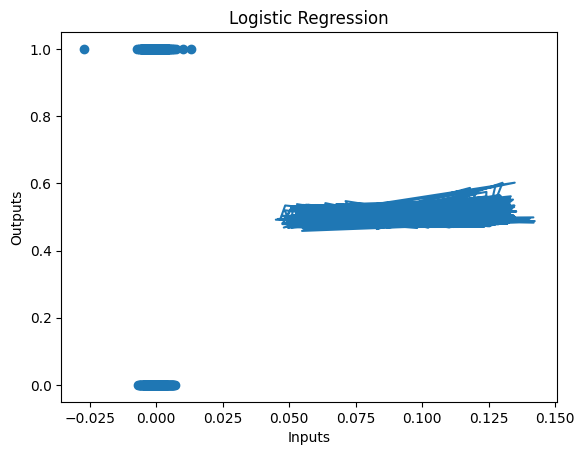

In [14]:
plt.scatter(x_data[:,0], y_data)
axes = plt.gca()
plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.title('Logistic Regression')

plt.plot(X_test[:,2], y_logis_predprob[:,1])

---
# Algorithm 2: k-Nearest Neighbours

In [15]:
# Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

## Method 1: No kFold

In [16]:
model_knn = make_pipeline(
    preprocessing.StandardScaler(),
    KNeighborsClassifier(n_neighbors=9)
)
model_knn.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

In [17]:
# Score to be recorded
model_knn.score(X_test, y_test)

0.7666666666666667

## Method 2: With kFold

In [18]:
n_folds = 5
ks = range(11)
train_scores = np.zeros((len(ks), n_folds))
valid_scores = np.zeros((len(ks), n_folds))
kf = KFold(n_splits=n_folds, shuffle=False)

for k in ks:
    if k == 0:
        continue

    print(k)
    fold = 0
    for train_index, val_index in kf.split(X_train):
        X_c, X_val = X_train[train_index], X_train[val_index]
        y_c, y_val = y_train[train_index], y_train[val_index]
        knn = make_pipeline(
            preprocessing.StandardScaler(),
            KNeighborsClassifier(n_neighbors=k)
        )
        knn.fit(X_c, y_c)
        train_scores[k, fold] = knn.score(X_c, y_c)
        valid_scores[k, fold] = knn.score(X_val, y_val)
        fold += 1

1
2
3
4
5
6
7
8
9
10


In [19]:
mean_train_scores = train_scores.mean(axis=1)
mean_valid_scores = valid_scores.mean(axis=1)

In [20]:
bestk = np.argmax(mean_valid_scores)
bestk

1

In [21]:
# Score to be recorded
mean_valid_scores[bestk]

0.7597883041550566

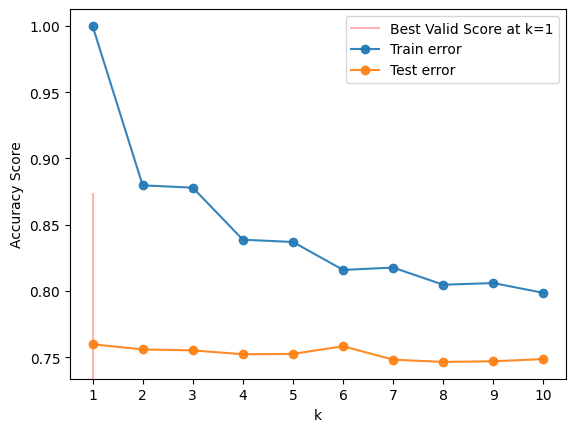

In [22]:
plt.axvline(bestk, 0,0.5, color='r', label="Best Valid Score at k=%d"%bestk, alpha=0.3)
plt.plot(ks[1:], mean_train_scores[1:], marker='o', label='Train error', alpha=0.9)
plt.plot(ks[1:], mean_valid_scores[1:], marker='o', label='Test error', alpha=0.9)
plt.legend(loc='upper right')
plt.xticks(range(1,11))
plt.xlabel('k')
plt.ylabel('Accuracy Score')
plt.show()

---
# Algorithm 3: Support Vector Machine (SVM)

In [23]:
# Libraries Needed
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [24]:
# Define variables for each kernels - "linear", "rbf", "poly"
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 2, 5]
gammas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 'scale']
degrees = [2,3,4,5,6,7,8]

In [25]:
param_grid = [
  {'svc__C': Cs, 'svc__kernel': ['linear']},
  {'svc__C': Cs, 'svc__gamma': gammas, 'svc__kernel': ['rbf']},
    {'svc__C': Cs, 'svc__degree': degrees, 'svc__kernel': ['poly']}
 ]

In [26]:
model_svm_pipeline = make_pipeline(
        preprocessing.StandardScaler(),
        SVC(kernel='linear')
)

In [27]:
model_svm_grid = GridSearchCV(model_svm_pipeline, param_grid=param_grid, verbose=2)

In [28]:
model_svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


[CV] END ..................svc__C=0.0001, svc__kernel=linear; total time=   5.2s
[CV] END ..................svc__C=0.0001, svc__kernel=linear; total time=   1.8s
[CV] END ..................svc__C=0.0001, svc__kernel=linear; total time=   2.5s
[CV] END ..................svc__C=0.0001, svc__kernel=linear; total time=   1.3s
[CV] END ..................svc__C=0.0001, svc__kernel=linear; total time=   1.1s
[CV] END ...................svc__C=0.001, svc__kernel=linear; total time=   1.1s
[CV] END ...................svc__C=0.001, svc__kernel=linear; total time=   1.3s
[CV] END ...................svc__C=0.001, svc__kernel=linear; total time=   1.4s
[CV] END ...................svc__C=0.001, svc__kernel=linear; total time=   1.4s
[CV] END ...................svc__C=0.001, svc__kernel=linear; total time=   1.6s
[CV] END ....................svc__C=0.01, svc__kernel=linear; total time=   1.0s
[CV] END ....................svc__C=0.01, svc__kernel=linear; total time=   1.3s
[CV] END ...................

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(kernel='linear'))]),
             param_grid=[{'svc__C': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5],
                          'svc__kernel': ['linear']},
                         {'svc__C': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5],
                          'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                         'scale'],
                          'svc__kernel': ['rbf']},
                         {'svc__C': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5],
                          'svc__degree': [2, 3, 4, 5, 6, 7, 8],
                          'svc__kernel': ['poly']}],
             verbose=2)

In [29]:
model_svm_grid.best_params_

{'svc__C': 5, 'svc__gamma': 10, 'svc__kernel': 'rbf'}

In [30]:
model_svm_grid.best_score_

0.7800837086495044

In [31]:
model_svm = model_svm_grid.best_estimator_

In [32]:
# Score to be recorded
model_svm.score(X_test, y_test)

0.768840579710145